<a href="https://colab.research.google.com/github/alzahra-20/Mec-20F20344/blob/main/Realfackeface.CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/Fake')))
print(len(os.listdir('/content/drive/MyDrive/train/Real')))
print(len(os.listdir('/content/drive/MyDrive/test/Fake1')))
print(len(os.listdir('/content/drive/MyDrive/test/Real')))

506
545
256
264


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 841 images belonging to 2 classes.
Found 210 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
27/27 [==============================] - 302s 11s/step - loss: 0.7267 - accuracy: 0.5042 - val_loss: 0.6933 - val_accuracy: 0.5190
Epoch 2/30
27/27 [==============================] - 135s 5s/step - loss: 0.6855 - accuracy: 0.5636 - val_loss: 0.6917 - val_accuracy: 0.5571
Epoch 3/30
27/27 [==============================] - 146s 5s/step - loss: 0.6724 - accuracy: 0.5957 - val_loss: 0.6941 - val_accuracy: 0.4810
Epoch 4/30
27/27 [==============================] - 144s 5s/step - loss: 0.6658 - accuracy: 0.6219 - val_loss: 0.6963 - val_accuracy: 0.4762
Epoch 5/30
27/27 [==============================] - 135s 5s/step - loss: 0.6515 - accuracy: 0.6338 - val_loss: 0.7202 - val_accuracy: 0.5286
Epoch 6/30
27/27 [==============================] - 135s 5s/step - loss: 0.5995 - accuracy: 0.6944 - val_loss: 0.7162 - val_accuracy: 0.5190
Epoch 7/30
27/27 [==============================] - 134s 5s/step - loss: 0.5024 - accuracy: 0.7539 - val_loss: 0.8209 - val_accuracy: 0.5476
Epoch 8/30
2

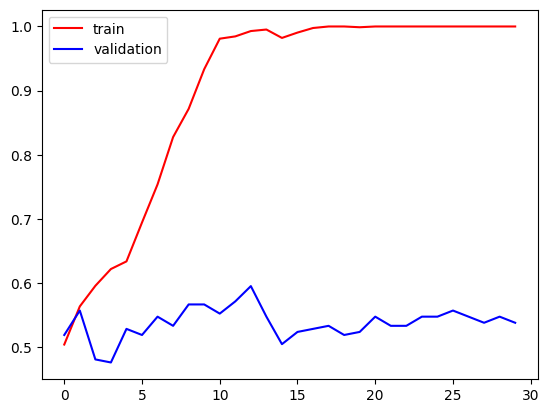

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

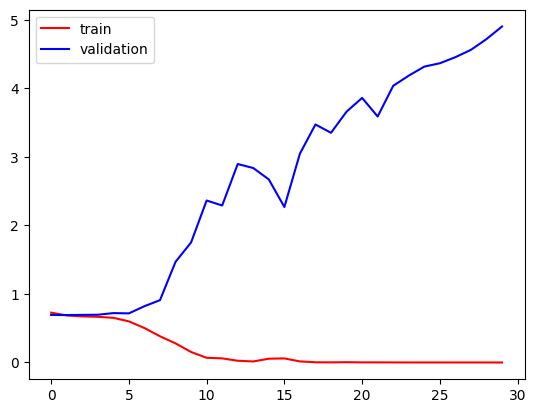

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 520 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

17/17 [==============================] - 110s 7s/step
[[2.91657187e-07]
 [2.70179549e-13]
 [1.45507764e-11]
 [1.04771729e-11]
 [9.99939680e-01]
 [6.45107196e-15]
 [1.00000000e+00]
 [5.13778654e-17]
 [9.95680928e-01]
 [8.69389467e-14]
 [9.86468971e-01]
 [2.35428359e-07]
 [2.43799400e-06]
 [1.00000000e+00]
 [1.03215292e-07]
 [9.99773979e-01]
 [1.00000000e+00]
 [3.56397023e-09]
 [9.34848504e-06]
 [6.26081373e-07]
 [3.93848754e-02]
 [5.11388644e-05]
 [9.99998808e-01]
 [5.34314822e-05]
 [9.99999881e-01]
 [9.99999583e-01]
 [1.00000000e+00]
 [8.91463242e-06]
 [1.01722144e-04]
 [1.11056361e-02]
 [9.83648717e-01]
 [2.17893940e-13]
 [9.99999821e-01]
 [4.05239671e-01]
 [3.18597586e-06]
 [9.99993622e-01]
 [1.00000000e+00]
 [9.99998450e-01]
 [1.00000000e+00]
 [9.99995530e-01]
 [1.00000000e+00]
 [7.88972306e-04]
 [1.17722311e-05]
 [4.15127666e-08]
 [1.00000000e+00]
 [9.47852022e-05]
 [1.13620381e-05]
 [9.99998868e-01]
 [9.99990702e-01]
 [1.00000000e+00]
 [7.08966076e-01]
 [8.53831097e-02]
 [2.801524

In [ ]:
len(predictions)

520

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[120 136]
 [139 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.47      0.47       256
           1       0.48      0.47      0.48       264

    accuracy                           0.47       520
   macro avg       0.47      0.47      0.47       520
weighted avg       0.47      0.47      0.47       520

